In [36]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'bubbly'

In [2]:
#df = px.data.iris() # iris is a pandas DataFrame

In [17]:
dataset = pd.read_csv('DAV_Project_dataset.csv')
dataset.head()

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [60]:
#Filter combined data for 5 happiest countires from 2015
happiest_countries = dataset[(dataset.Country == 'Switzerland') | (dataset.Country == 'Iceland') | (dataset.Country == 'Denmark') | (dataset.Country == 'Norway') | (dataset.Country == 'Canada')]

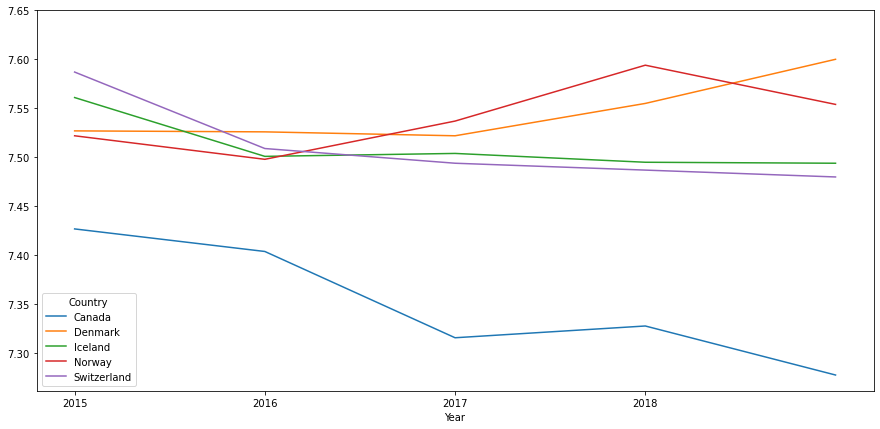

In [21]:
#Plot happiness scores
fig, ax = plt.subplots(figsize=(15,7))
happiest_countries.groupby(['Year','Country']).mean()['Happiness_Score'].unstack().plot(ax=ax)
plt.xticks(np.arange(2015, 2019, 1)); #X-axis range
plt.yticks(np.arange(7.30, 7.65, 0.05)); #Y-axis range

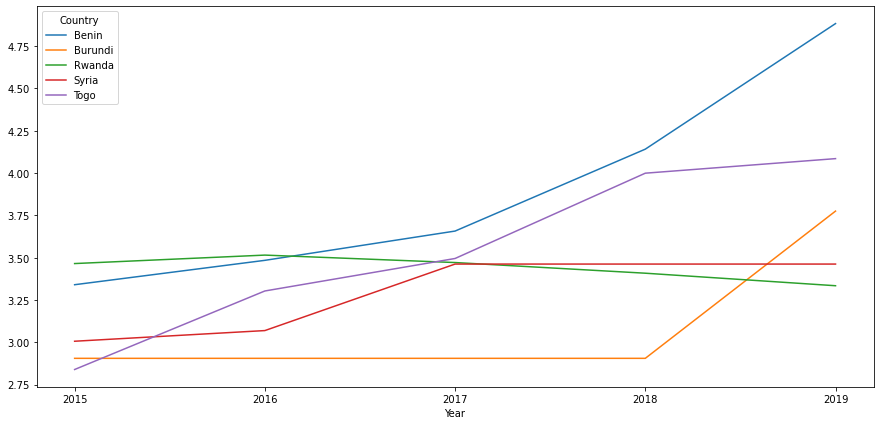

In [28]:
#Filter combined data for 5 least happiest countires from 2015
least_happy_countries = dataset[(dataset.Country == 'Rwanda') | (dataset.Country == 'Benin') | (dataset.Country == 'Syria') | (dataset.Country == 'Burundi') | (dataset.Country == 'Togo')]
fig, ax = plt.subplots(figsize=(15,7))
least_happy_countries.groupby(['Year','Country']).mean()['Happiness_Score'].unstack().plot(ax=ax)
plt.xticks(np.arange(2015, 2020, 1)); #X-axis range
plt.yticks(np.arange(2.75, 4.80, 0.25)); 

In [32]:
happiness_mean = dataset['Happiness_Score'].mean()
happiness_mean

5.3879161289729005

In [59]:
#Do not proceed further. POC.

import matplotlib
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as po
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

dataset['lower_happy'] = dataset['Happiness_Score'].apply(lambda x: 0 if x < happiness_mean else 1)

low_c = '#dd4124'
high_c = '#009473'
background_color = '#fbfbfb'
fig = plt.figure(figsize=(12, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.5)


<Figure size 1800x1500 with 0 Axes>

In [52]:
plot = 0
for row in range(0, 3):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1
    

<ipython-input-52-12f8d896de93>:4: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



In [47]:
plot = 0
Yes = dataset[dataset['lower_happy'] == 1]
No = dataset[dataset['lower_happy'] == 0]

newdata1 = dataset.iloc[:,4:]
continuous = [var for var in newdata1.columns if newdata1[var].dtype!='O']

In [57]:
for variable in continuous:
        sns.kdeplot(Yes[variable],ax=locals()["ax"+str(plot)], color=high_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[variable],ax=locals()["ax"+str(plot)], color=low_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.5), 'Differences Between Happy & Unhappy Countries', fontsize=15, fontweight='bold', fontfamily='sansserif',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.25), 'There are large differences, with GDP & Social Support being clear perhaps more interesting though,unhappy\ncountries appear to be more generous.', fontsize=10, fontweight='light', fontfamily='monospace',color='gray')

plt.show()

KeyError: 'ax9'